In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/waveform_data.csv")

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
0,-1.23,-1.56,-1.75,-0.28,0.60,2.22,0.85,0.21,-0.20,0.89,...,2.89,7.75,4.59,3.15,5.12,3.32,1.20,0.24,-0.56,2
1,-0.69,2.43,0.61,2.08,2.30,3.25,5.52,4.55,2.97,2.22,...,1.24,1.89,1.88,-1.34,0.83,1.41,1.78,0.60,2.42,1
2,-0.12,-0.94,1.29,2.59,2.42,3.55,4.94,3.25,1.90,2.07,...,2.50,0.12,1.41,2.78,0.64,0.62,-0.01,-0.79,-0.12,0
3,0.86,0.29,2.19,-0.02,1.13,2.51,2.37,5.45,5.45,4.84,...,2.58,1.40,1.24,1.41,1.07,-1.43,2.84,-1.18,1.12,1
4,1.16,0.37,0.40,-0.59,2.66,1.00,2.69,4.06,5.34,3.53,...,4.30,1.84,1.73,0.21,-0.18,0.13,-0.21,-0.80,-0.68,1


In [ ]:
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,...,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.005144,0.338746,0.672438,0.991610,1.310888,1.997306,2.661806,2.659228,2.672086,2.988668,...,2.678908,2.648632,2.647668,2.000504,1.335032,1.000622,0.661482,0.357300,-0.021378,1.007800
std,1.010130,1.053657,1.187970,1.415239,1.678291,1.814187,2.015774,1.746067,1.663277,1.531506,...,1.651588,1.760113,2.018768,1.810684,1.669949,1.412815,1.197326,1.081337,0.997064,0.818946
min,-3.340000,-3.250000,-4.200000,-3.840000,-3.480000,-2.760000,-3.320000,-3.520000,-3.380000,-1.790000,...,-2.610000,-2.820000,-2.560000,-2.990000,-3.560000,-4.080000,-3.500000,-3.570000,-3.880000,0.000000
25%,-0.680000,-0.372500,-0.150000,-0.020000,0.037500,0.590000,1.110000,1.390000,1.470000,1.880000,...,1.480000,1.360000,1.120000,0.640000,0.070000,-0.010000,-0.180000,-0.350000,-0.690000,0.000000
50%,0.010000,0.340000,0.660000,0.940000,1.120000,1.860000,2.500000,2.720000,2.810000,3.000000,...,2.830000,2.700000,2.490000,1.820000,1.200000,0.940000,0.620000,0.350000,-0.030000,1.000000
75%,0.690000,1.050000,1.460000,1.970000,2.540000,3.340000,4.210000,3.940000,3.940000,4.080000,...,3.932500,3.980000,4.182500,3.330000,2.532500,1.960000,1.470000,1.072500,0.660000,2.000000
max,3.940000,3.880000,4.720000,5.750000,6.500000,7.620000,8.760000,7.840000,7.900000,7.630000,...,7.500000,7.750000,8.720000,7.860000,6.740000,6.200000,5.280000,4.650000,4.010000,2.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       5000 non-null   float64
 1   1       5000 non-null   float64
 2   2       5000 non-null   float64
 3   3       5000 non-null   float64
 4   4       5000 non-null   float64
 5   5       5000 non-null   float64
 6   6       5000 non-null   float64
 7   7       5000 non-null   float64
 8   8       5000 non-null   float64
 9   9       5000 non-null   float64
 10  10      5000 non-null   float64
 11  11      5000 non-null   float64
 12  12      5000 non-null   float64
 13  13      5000 non-null   float64
 14  14      5000 non-null   float64
 15  15      5000 non-null   float64
 16  16      5000 non-null   float64
 17  17      5000 non-null   float64
 18  18      5000 non-null   float64
 19  19      5000 non-null   float64
 20  20      5000 non-null   float64
 21  21      5000 non-null   int64  
dtype

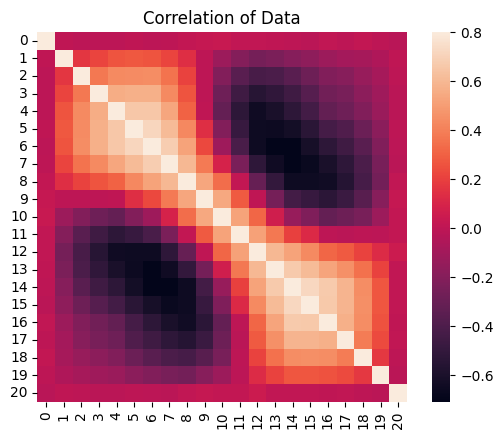

In [ ]:
data_corr = df.corr()
sns.heatmap(data_corr , vmax=.8, square=True)
plt.title("Correlation of Data")
plt.show()

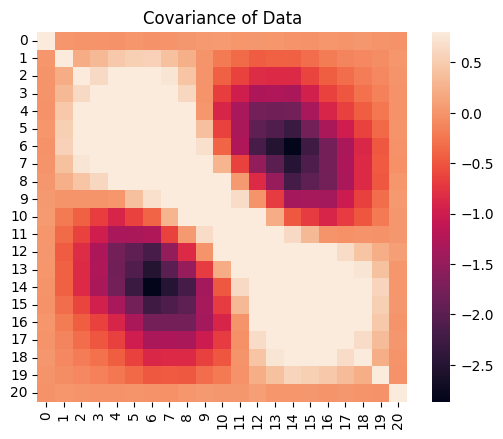

In [ ]:
data_covariance = df.cov()
sns.heatmap(data_covariance, vmax=.8, square=True)
plt.title("Covariance of Data")
plt.show()

In [ ]:
correlation_matrix = df.corr()

# Find the most correlated pair of columns
most_correlated_pair = None
max_correlation = 0

for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        correlation_value = correlation_matrix.iloc[i, j]

        if abs(correlation_value) > max_correlation:
            max_correlation = abs(correlation_value)
            most_correlated_pair = (correlation_matrix.columns[i], correlation_matrix.columns[j])

print(f"The most correlated pair of columns is: {most_correlated_pair} with a correlation of {max_correlation:.2f}")

The most correlated pair of columns is: ('14', '15') with a correlation of 0.72


In [ ]:
correlation_matrix = df.corr()
print(correlation_matrix)

           0         1         2         3         4         5         6  \
0   1.000000  0.003445 -0.012182 -0.008974 -0.010520  0.003936 -0.009380   
1   0.003445  1.000000  0.168465  0.213244  0.260190  0.271216  0.258219   
2  -0.012182  0.168465  1.000000  0.372892  0.430006  0.440335  0.440655   
3  -0.008974  0.213244  0.372892  1.000000  0.558078  0.570066  0.565426   
4  -0.010520  0.260190  0.430006  0.558078  1.000000  0.655717  0.655947   
5   0.003936  0.271216  0.440335  0.570066  0.655717  1.000000  0.715144   
6  -0.009380  0.258219  0.440655  0.565426  0.655947  0.715144  1.000000   
7  -0.003983  0.212376  0.355403  0.430403  0.529678  0.609012  0.681378   
8   0.014483  0.134737  0.209571  0.260621  0.300970  0.426313  0.520954   
9   0.025222 -0.004828 -0.003468 -0.004680  0.002807  0.134934  0.222589   
10  0.031390 -0.124312 -0.208134 -0.283565 -0.318316 -0.209955 -0.117340   
11  0.007920 -0.207686 -0.357164 -0.456966 -0.527066 -0.485205 -0.419717   
12  0.008378

In [ ]:
y_column_name = df.columns[21]
y = df[y_column_name]
df.drop(columns=[y_column_name], inplace=True)
x_train,x_test,y_train,y_test = train_test_split(df,y,test_size=0.2,random_state=42)


In [ ]:
x_train_correlated = x_train.iloc[:,14:16]
x_test_correlated = x_test.iloc[:,14:16]

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_x_train = pd.DataFrame({'Feature': x_train.columns, 'Importance': feature_importances})
feature_importance_x_train = feature_importance_x_train.sort_values(by='Importance', ascending=False)
threshold = 0.08
selected_features = feature_importance_x_train[feature_importance_x_train['Importance'] > threshold]['Feature']
x_train_selected = x_train[selected_features]
x_test_selected = x_test[selected_features]
print("Original DataFrame:")
print(x_train.head())
print("\nDataFrame with Selected Features:")
print(x_train_selected)
print("\nDataFrame with test Selected Features:")
print(x_test_selected)

Original DataFrame:
         0     1     2     3     4     5     6     7     8     9  ...    11  \
4227 -1.33  1.02  0.16  1.34  2.39  1.75  5.03  4.75  2.81  4.70  ...  4.99   
4676  0.33  0.87 -0.49  1.23  0.12  0.06  1.22  0.75  0.07  3.48  ...  2.54   
800  -1.56 -2.15  0.99 -0.28 -1.06  0.99  1.60  2.86  4.20  1.78  ...  5.14   
3671 -0.03  1.51  1.33 -0.08 -1.20  0.91  2.16  3.48  4.21  4.40  ...  5.73   
4193  1.36 -0.46 -0.99  1.09  0.90  1.85  2.93  3.00  3.42  4.71  ...  4.21   

        12    13    14    15    16    17    18    19    20  
4227  1.04  2.15 -1.45 -0.29  0.26  1.94  1.01 -1.99 -0.65  
4676  4.51  4.31  6.06  4.14  2.87  3.90  2.25  3.21 -0.02  
800   4.83  4.15  3.39  5.80  0.71  0.12 -0.42 -0.64 -0.28  
3671  4.52  4.24  0.63 -0.70 -0.90 -0.06  0.15 -0.89  1.09  
4193  2.25  2.79 -0.47 -0.64 -0.37  0.65  0.38  1.45 -0.17  

[5 rows x 21 columns]

DataFrame with Selected Features:
        10     6
4227  3.57  5.03
4676  1.91  1.22
800   3.62  1.60
3671  6.02  2

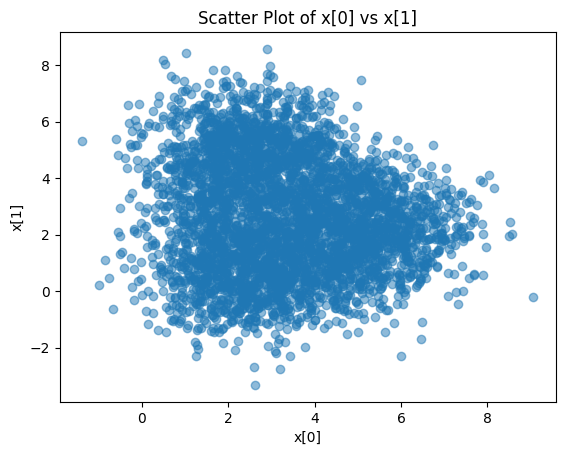

In [ ]:
x0 = x_train_selected.iloc[:, 0]
x1 = x_train_selected.iloc[:, 1]
plt.scatter(x0, x1, alpha=0.5)  # You can adjust the alpha parameter for transparency
plt.title('Scatter Plot of x[0] vs x[1]')
plt.xlabel('x[0]')
plt.ylabel('x[1]')
plt.show()

In [ ]:
x_train_selected.reset_index(inplace=True)

print(x_train_selected)


      index    10     6
0      4227  3.57  5.03
1      4676  1.91  1.22
2       800  3.62  1.60
3      3671  6.02  2.16
4      4193  4.13  2.93
...     ...   ...   ...
3995   4426  4.01  4.72
3996    466  4.63  4.14
3997   3092  3.96  3.79
3998   3772  5.44  5.49
3999    860  4.82 -0.15

[4000 rows x 3 columns]


In [ ]:
x_test_selected.reset_index(inplace=True)
print(x_test_selected)

     index    10     6
0     1501  3.51  2.27
1     2586  3.94  2.81
2     2653  2.93  0.41
3     1055  0.24  2.66
4      705  3.96  0.63
..     ...   ...   ...
995   4711  4.70  4.36
996   2313  0.96 -0.17
997   3214  2.11  3.16
998   2732  2.06  4.29
999   1926  4.74  4.19

[1000 rows x 3 columns]


In [ ]:
y_train = pd.DataFrame(y_train)
y_train.reset_index(inplace=True)
print(y_train)

      index  21
0      4227   1
1      4676   0
2       800   2
3      3671   2
4      4193   1
...     ...  ..
3995   4426   1
3996    466   1
3997   3092   1
3998   3772   1
3999    860   2

[4000 rows x 2 columns]


In [ ]:
y_test = pd.DataFrame(y_test)
y_test.reset_index(inplace=True)
print(y_test)

     index  21
0     1501   1
1     2586   2
2     2653   2
3     1055   0
4      705   2
..     ...  ..
995   4711   1
996   2313   0
997   3214   0
998   2732   0
999   1926   1

[1000 rows x 2 columns]


In [ ]:
train_yy = np.array(y_train.iloc[:,1])
print(train_yy[739])

0


In [ ]:
test_yy = np.array(y_test.iloc[:,1])
print(len(test_yy))

1000


In [ ]:
def euclidean_distance(x1, x2,y1,y2):
    # Implementation of Euclidean distance and Calculate the Euclidean distance
    distance = np.sqrt(((x1 - y1)**2 + (x2 - y2)**2))
    return distance
    pass

def get_indices_of_k_smallest(lst, k):
    indices = sorted(range(len(lst)), key=lambda i: lst[i])[:k]
    #print(indices)
    return indices

def check_accuracy(predictions,test_yy):
    equal_count = 0
    accuracy = 0
    predictions = np.array(predictions)
    total_observations = len(predictions)
    for elem1, elem2 in zip(predictions, test_yy):
        if elem1 == elem2:
            equal_count += 1
    accuracy = equal_count / total_observations
    return accuracy

# Implement the KNN algorithm
def knn_predict(X_train,Y_train,X_test,y_test, knn):
    predictions = []
    distances = []
    max_dis = -999999
    train_x = np.array(X_train.iloc[:, 0])
    train_y = np.array(X_train.iloc[:, 1])
    test_x = np.array(X_test.iloc[:, 0])
    test_y = np.array(X_test.iloc[:, 1])
    train_yy = np.array(Y_train.iloc[:,1])
    for i in range(len(X_test)):
      distances = []
      for j in range(len(X_train)):
        distances.append(euclidean_distance(train_x[j],train_y[j],test_x[i],test_y[i])) # Calculate distances between the test point and all training points
      neighbors_indices = get_indices_of_k_smallest(distances,knn) # Get the indices of the k-nearest neighbors
      neighbors_labels = [train_yy[h] for h in neighbors_indices] # Get the labels of the k-nearest neighbors
      prediction = max(set(neighbors_labels), key=neighbors_labels.count) # Make a prediction based on the majority class among the neighbors
      predictions.append(prediction)
    return predictions

accuracy_array = np.zeros(100)
for i in range(1,101):
  predictions = knn_predict(x_train_selected, y_train, x_test_selected,y_test, i)
  accuracy_array[i-1] = accuracy_score(test_yy, predictions)
print(accuracy_array)

[0.392 0.397 0.385 0.373 0.369 0.372 0.366 0.36  0.341 0.338 0.344 0.327
 0.319 0.319 0.314 0.321 0.327 0.32  0.331 0.331 0.326 0.334 0.33  0.33
 0.332 0.327 0.324 0.333 0.324 0.307 0.315 0.32  0.32  0.326 0.312 0.317
 0.325 0.319 0.327 0.305 0.31  0.31  0.322 0.333 0.326 0.336 0.335 0.329
 0.334 0.329 0.337 0.337 0.337 0.333 0.33  0.327 0.329 0.338 0.329 0.33
 0.337 0.341 0.335 0.34  0.32  0.337 0.33  0.325 0.329 0.332 0.338 0.321
 0.335 0.333 0.332 0.332 0.33  0.324 0.337 0.337 0.333 0.339 0.334 0.322
 0.329 0.335 0.34  0.336 0.344 0.335 0.333 0.332 0.339 0.34  0.332 0.325
 0.33  0.326 0.331 0.317 0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0

In [ ]:
print("Best k = ",np.argmax(accuracy_array) + 1)

Best k =  2


In [ ]:
accuracy_array_correlated = np.zeros(100)
for i in range(1,101):
  predictions_correlated = knn_predict(x_train_correlated, y_train, x_test_correlated,y_test, i)
  accuracy_array_correlated[i-1] = accuracy_score(test_yy, predictions_correlated)
print(accuracy_array_correlated)

[0.494 0.475 0.54  0.51  0.533 0.543 0.55  0.533 0.558 0.558 0.567 0.555
 0.554 0.551 0.558 0.56  0.574 0.555 0.576 0.567 0.563 0.57  0.573 0.578
 0.58  0.578 0.586 0.582 0.577 0.582 0.578 0.579 0.581 0.583 0.588 0.584
 0.578 0.589 0.581 0.582 0.581 0.583 0.586 0.585 0.579 0.574 0.575 0.58
 0.577 0.582 0.576 0.576 0.581 0.587 0.588 0.583 0.585 0.582 0.584 0.585
 0.587 0.589 0.59  0.581 0.586 0.583 0.58  0.577 0.579 0.574 0.574 0.573
 0.574 0.573 0.57  0.576 0.578 0.579 0.583 0.582 0.583 0.583 0.591 0.585
 0.588 0.587 0.586 0.584 0.583 0.585 0.588 0.587 0.589 0.584 0.585 0.584
 0.584 0.583 0.587 0.587]


In [ ]:
print("Best k = ",np.argmax(accuracy_array_correlated)+1)

Best k =  83


In [ ]:
print(len(predictions))

1000


In [ ]:
print(test_yy)

[1 2 2 0 2 0 1 1 1 2 1 0 0 1 0 1 0 0 1 0 0 0 0 1 1 2 0 0 2 2 2 0 1 0 0 0 1
 1 1 1 1 0 1 0 0 1 1 2 1 2 2 1 2 0 2 0 2 1 1 2 0 2 1 0 1 2 1 2 0 2 1 1 2 2
 2 1 2 0 1 0 2 1 1 1 1 2 1 1 1 1 2 0 1 2 1 1 2 0 0 1 1 0 1 2 2 0 1 2 2 1 0
 2 2 2 2 0 2 0 2 2 1 1 0 1 1 0 0 1 1 2 1 2 1 1 1 0 2 0 1 1 0 2 2 1 1 1 2 1
 0 0 0 0 2 1 0 2 0 0 0 1 0 0 1 1 1 2 1 0 2 1 0 2 2 1 0 2 2 1 1 1 0 2 0 1 2
 2 1 0 2 2 1 1 0 2 2 1 1 2 2 0 1 0 0 1 2 2 0 1 2 0 2 2 0 1 2 1 1 0 2 0 2 2
 2 2 1 1 2 1 1 2 2 0 2 2 0 2 2 0 0 0 1 2 0 1 1 1 1 1 1 0 2 2 1 0 2 2 2 2 1
 0 2 1 2 1 2 1 0 2 1 1 1 1 1 1 0 1 2 0 2 0 0 1 1 2 2 2 2 0 2 0 2 0 1 1 1 1
 1 1 1 1 1 2 1 1 1 2 2 0 2 2 2 0 1 0 2 2 1 2 0 0 2 2 0 1 0 1 0 0 2 2 2 1 0
 0 2 2 2 1 1 1 0 1 0 1 0 0 1 0 2 0 0 0 1 1 2 2 0 0 2 1 0 0 1 2 1 0 0 2 2 1
 1 0 0 1 2 1 0 2 1 1 0 2 1 2 1 1 2 1 0 1 1 1 2 0 2 0 0 1 1 0 1 1 0 2 1 1 0
 1 1 1 1 2 0 2 0 2 1 0 1 2 1 0 1 0 1 2 1 1 1 2 0 0 0 1 2 1 1 2 2 1 0 0 2 0
 1 1 2 0 0 1 0 2 0 0 0 2 2 1 1 0 0 0 0 1 0 0 0 0 2 1 1 2 0 0 2 2 0 1 1 1 0
 0 2 1 2 0 1 2 2 2 1 0 2 

Text(0.5, 1.0, 'K value vs Accuracy')

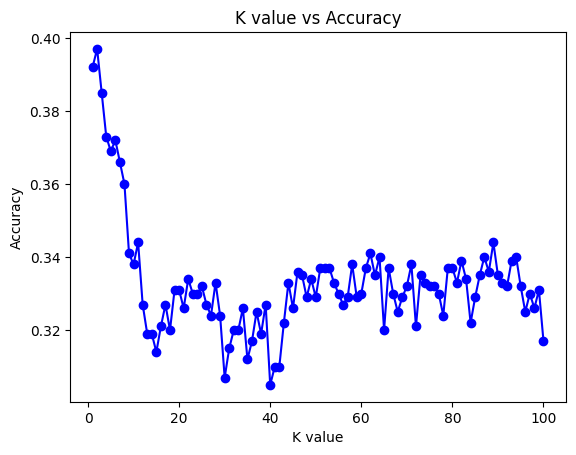

In [ ]:
accuracy_array = accuracy_array[:100]
x_axis = list(range(1, 101))

plt.plot(x_axis, accuracy_array, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K value vs Accuracy')


Text(0.5, 1.0, 'K value vs Accuracy')

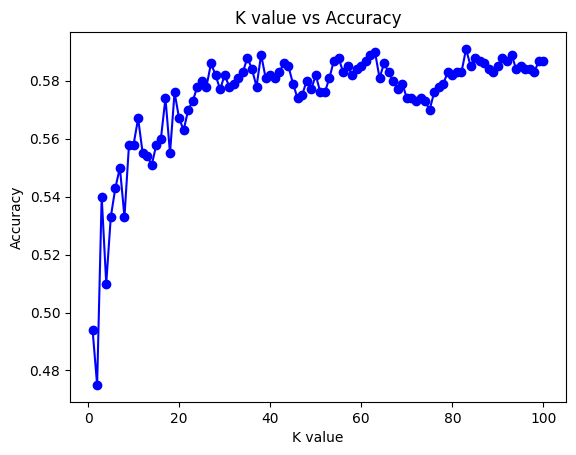

In [ ]:
plt.plot(x_axis, accuracy_array_correlated, marker='o', linestyle='-', color='b')

# Adding labels and title
plt.xlabel('K value')
plt.ylabel('Accuracy')
plt.title('K value vs Accuracy')